In [628]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [629]:
df=pd.read_excel(r"C:\Users\User\Downloads\Data_MidTerm_Project_Real_State_Regression.xls")

In [630]:
df



,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1999700045,2014-05-02,3,1.50,1340,7912,1.5,0,0,3,...,1340,0,1955,0,98133,47.7658,-122.339,1480,7940,313000
1,1860600135,2014-05-02,5,2.50,3650,9050,2.0,0,4,5,...,3370,280,1921,0,98119,47.6345,-122.367,2880,5400,2380000
2,5467900070,2014-05-02,3,2.00,1930,11947,1.0,0,0,4,...,1930,0,1966,0,98042,47.3672,-122.151,2200,12825,342000
3,4040800810,2014-05-02,3,2.25,2000,8030,1.0,0,0,4,...,1000,1000,1963,0,98008,47.6188,-122.114,2070,8250,420000
4,7197300105,2014-05-02,4,2.50,1940,10500,1.0,0,0,4,...,1140,800,1976,0,98052,47.6830,-122.114,2200,10500,550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5057100110,2015-05-14,5,3.00,3223,6371,2.0,0,0,3,...,3223,0,2014,0,98042,47.3584,-122.163,1979,9008,479349
21593,8562790720,2015-05-14,4,3.50,2630,3757,2.0,0,0,3,...,2200,430,2008,0,98027,47.5322,-122.075,2620,2699,749950
21594,7923600250,2015-05-15,5,2.00,1870,7344,1.5,0,0,3,...,1870,0,1960,0,98007,47.5951,-122.144,1870,7650,450000
21595,5101400871,2015-05-24,2,1.75,1390,6670,1.0,0,0,3,...,720,670,1941,0,98115,47.6914,-122.308,920,6380,445500


In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [632]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [633]:
# Check columns correlation 

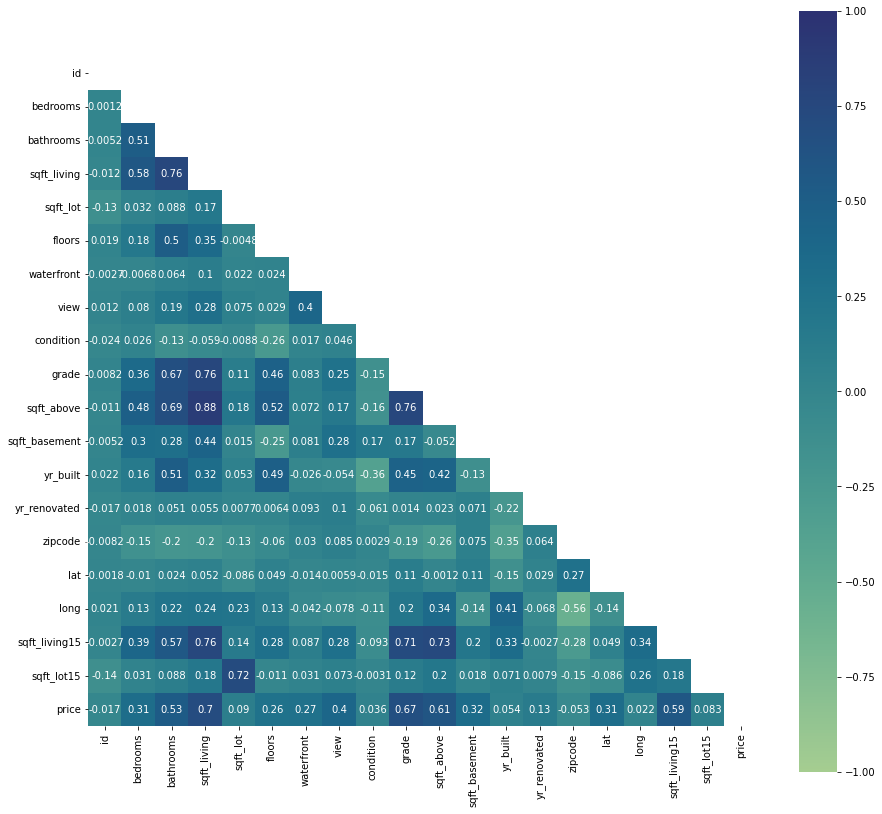

In [634]:
corr = df.corr()
mask = np.zeros_like(corr)
#Generate a mask to only show bottom triangle
mask[np.triu_indices_from(mask)] = True

    
#set figure size
f, ax = plt.subplots(figsize=(15, 14))
    
#generate heatmap
ax = sns.heatmap(corr, mask=mask,cmap='crest', vmin=-1,vmax=1,annot=True, square=True)

In [635]:
# Cleaning the data

In [636]:
df1=df.drop(columns=['id','lat','long','date'],axis = 1)

In [637]:
df1.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [638]:
df1.duplicated().unique()

array([False,  True])

# Removing outliers

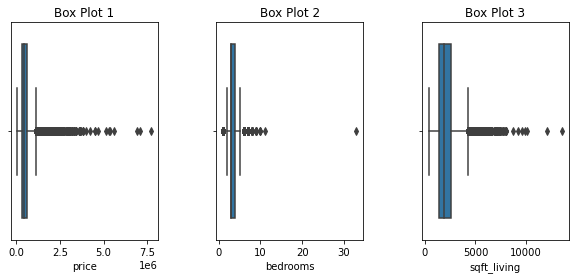

In [639]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Plot the first box plot in the first subplot
sns.boxplot(x=df1["price"], ax=axs[0])
axs[0].set_title('Box Plot 1')

# Plot the second box plot in the second subplot
sns.boxplot(x=df1["bedrooms"], ax=axs[1])
axs[1].set_title('Box Plot 2')

# Plot the third box plot in the third subplot
sns.boxplot(x=df1["sqft_living"], ax=axs[2])
axs[2].set_title('Box Plot 3')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

In [640]:
q = df1["price"].quantile(0.95)

In [641]:
df1_filtered = df1[(df1["price"] < q) ]

In [642]:
len(df1_filtered)

20513

In [643]:
q1 = df1_filtered["bedrooms"].quantile(0.95)

In [644]:
df1_filtered1 = df1_filtered[(df1_filtered["bedrooms"] < q1) ]

In [645]:
len(df1_filtered1)

18885

In [646]:
q2 = df1_filtered1["sqft_living"].quantile(0.95)

In [647]:
df1_filtered2 = df1_filtered1[(df1_filtered1["sqft_living"] < q2) ]

In [648]:
len(df1_filtered2)

17925

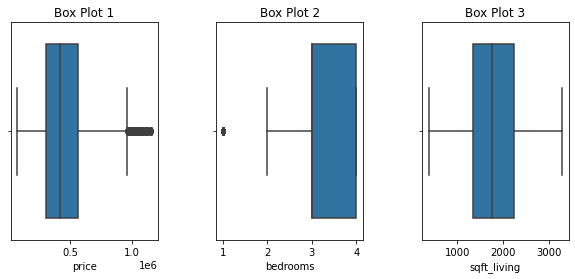

In [649]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Plot the first box plot in the first subplot
sns.boxplot(x=df1_filtered2["price"], ax=axs[0])
axs[0].set_title('Box Plot 1')

# Plot the second box plot in the second subplot
sns.boxplot(x=df1_filtered2["bedrooms"], ax=axs[1])
axs[1].set_title('Box Plot 2')

# Plot the third box plot in the third subplot
sns.boxplot(x=df1_filtered2["sqft_living"], ax=axs[2])
axs[2].set_title('Box Plot 3')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

In [650]:
df2=df1_filtered2

Changing the renovation to 0 - if renovated before 1980 and 1 - after 1980

In [651]:
df2['yr_renovated'].unique()

array([   0, 1994, 1954, 2011, 2014, 1998, 1992, 2005, 1986, 2013, 2004,
       2001, 1990, 2003, 2010, 2000, 1977, 1996, 2007, 1970, 1983, 1981,
       1975, 1971, 1988, 1999, 2009, 1984, 1997, 2015, 1989, 1982, 2006,
       1993, 1953, 1955, 1979, 1987, 1960, 2002, 1969, 1934, 1945, 2008,
       1980, 2012, 1985, 1972, 1958, 1948, 1978, 1968, 1995, 1974, 1991,
       1965, 1946, 1940, 1963, 1976, 1964, 1973, 1967, 1944, 1959, 1957,
       1951, 1950], dtype=int64)

In [652]:
df2['yr_renovated'] = df2['yr_renovated'].apply(lambda x: 1 if x > 1980 else 0)

C:\Users\User\AppData\Local\Temp\ipykernel_65108\3927862823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['yr_renovated'] = df2['yr_renovated'].apply(lambda x: 1 if x > 1980 else 0)


In [653]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17925 entries, 0 to 21595
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       17925 non-null  int64  
 1   bathrooms      17925 non-null  float64
 2   sqft_living    17925 non-null  int64  
 3   sqft_lot       17925 non-null  int64  
 4   floors         17925 non-null  float64
 5   waterfront     17925 non-null  int64  
 6   view           17925 non-null  int64  
 7   condition      17925 non-null  int64  
 8   grade          17925 non-null  int64  
 9   sqft_above     17925 non-null  int64  
 10  sqft_basement  17925 non-null  int64  
 11  yr_built       17925 non-null  int64  
 12  yr_renovated   17925 non-null  int64  
 13  zipcode        17925 non-null  int64  
 14  sqft_living15  17925 non-null  int64  
 15  sqft_lot15     17925 non-null  int64  
 16  price          17925 non-null  int64  
dtypes: float64(2), int64(15)
memory usage: 2.5 MB


Binning the year built

In [654]:
df2['yr_built'].min()

1900

In [655]:
bins = [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]

In [656]:
labels = [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]

In [657]:
df2["yr_built_binned"] = pd.cut(df2["yr_built"], bins=bins,labels=labels)

C:\Users\User\AppData\Local\Temp\ipykernel_65108\169496107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["yr_built_binned"] = pd.cut(df2["yr_built"], bins=bins,labels=labels)


In [658]:
df2[df2['yr_built_binned']==1900]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,yr_built_binned
91,2,1.00,1140,5400,1.0,0,0,5,7,1140,0,1908,0,98112,1520,4800,549000,1900
101,3,2.50,1680,2000,3.0,0,0,3,9,1680,0,1909,1,98105,1950,5000,670000,1900
121,4,1.75,2010,3600,1.5,0,0,3,7,2010,0,1902,0,98119,2010,3600,740000,1900
230,3,2.00,1420,4080,1.5,0,0,3,7,1420,0,1905,1,98103,1420,4590,485000,1900
233,2,1.75,1170,2400,1.0,0,0,4,7,740,430,1903,0,98103,1570,3919,499000,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21484,4,1.00,1610,6000,1.5,0,0,4,7,1510,100,1905,0,98118,1430,6000,426250,1900
21486,1,1.00,720,2500,1.0,0,0,3,7,720,0,1910,0,98103,1520,3750,438600,1900
21512,3,1.50,2200,2880,2.0,0,0,5,7,1440,760,1904,0,98112,2440,4640,885000,1900
21571,3,1.75,1540,8400,1.5,0,0,3,7,1540,0,1902,0,98122,1330,4800,900000,1900



 Dummified the zip column


In [659]:
df_zip=pd.get_dummies(df2['zipcode'], drop_first=True)

In [660]:
df3=df2.join(df_zip)

In [661]:
df3

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3,1.50,1340,7912,1.5,0,0,3,7,1340,...,0,0,0,0,0,0,0,0,0,0
2,3,2.00,1930,11947,1.0,0,0,4,8,1930,...,0,0,0,0,0,0,0,0,0,0
3,3,2.25,2000,8030,1.0,0,0,4,8,1000,...,0,0,0,0,0,0,0,0,0,0
4,4,2.50,1940,10500,1.0,0,0,4,7,1140,...,0,0,0,0,0,0,0,0,0,0
5,2,1.00,880,6380,1.0,0,0,3,7,880,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,3,2.00,1410,44866,1.0,0,0,4,7,1410,...,0,0,0,0,0,0,0,0,0,0
21590,3,1.75,1900,4000,1.0,0,0,3,7,1300,...,0,0,0,0,0,0,0,0,0,0
21591,4,1.75,1980,5850,1.0,0,1,4,8,1380,...,0,0,0,0,0,0,0,0,0,0
21593,4,3.50,2630,3757,2.0,0,0,3,10,2200,...,0,0,0,0,0,0,0,0,0,0


In [662]:
df_year_built=pd.get_dummies(df2['yr_built_binned'], drop_first=True)

In [663]:
df_year_built = df_year_built.astype(np.int64)

In [664]:
df_year_built

,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21588,0,0,0,0,0,0,0,1,0,0,0
21590,0,0,0,0,0,1,0,0,0,0,0
21591,0,0,0,0,1,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,1,0


In [665]:
df4=df3.join(df_year_built)

In [666]:
df4

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
0,3,1.50,1340,7912,1.5,0,0,3,7,1340,...,0,0,0,1,0,0,0,0,0,0
2,3,2.00,1930,11947,1.0,0,0,4,8,1930,...,0,0,0,0,1,0,0,0,0,0
3,3,2.25,2000,8030,1.0,0,0,4,8,1000,...,0,0,0,0,1,0,0,0,0,0
4,4,2.50,1940,10500,1.0,0,0,4,7,1140,...,0,0,0,0,0,1,0,0,0,0
5,2,1.00,880,6380,1.0,0,0,3,7,880,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,3,2.00,1410,44866,1.0,0,0,4,7,1410,...,0,0,0,0,0,0,1,0,0,0
21590,3,1.75,1900,4000,1.0,0,0,3,7,1300,...,0,0,0,0,1,0,0,0,0,0
21591,4,1.75,1980,5850,1.0,0,1,4,8,1380,...,0,0,0,1,0,0,0,0,0,0
21593,4,3.50,2630,3757,2.0,0,0,3,10,2200,...,0,0,0,0,0,0,0,0,1,0


In [667]:
df4.isna().values.any()

True

In [668]:
df4.columns[df4.isna().any()].tolist()

['yr_built_binned']

In [669]:
df4=df4.drop('yr_built_binned',axis = 1)

In [707]:
df4.columns = df4.columns.astype(str)

# OLS modeling

In [742]:
X=df4.drop('price', axis=1)
y=df4.price
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
0,3,1.50,1340,7912,1.5,0,0,3,7,1340,...,0,0,0,1,0,0,0,0,0,0
2,3,2.00,1930,11947,1.0,0,0,4,8,1930,...,0,0,0,0,1,0,0,0,0,0
3,3,2.25,2000,8030,1.0,0,0,4,8,1000,...,0,0,0,0,1,0,0,0,0,0
4,4,2.50,1940,10500,1.0,0,0,4,7,1140,...,0,0,0,0,0,1,0,0,0,0
5,2,1.00,880,6380,1.0,0,0,3,7,880,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,3,2.00,1410,44866,1.0,0,0,4,7,1410,...,0,0,0,0,0,0,1,0,0,0
21590,3,1.75,1900,4000,1.0,0,0,3,7,1300,...,0,0,0,0,1,0,0,0,0,0
21591,4,1.75,1980,5850,1.0,0,1,4,8,1380,...,0,0,0,1,0,0,0,0,0,0
21593,4,3.50,2630,3757,2.0,0,0,3,10,2200,...,0,0,0,0,0,0,0,0,1,0


In [743]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size= 0.2 ,random_state=123)

STANDARIZE

In [744]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [745]:
X_test_scaled=std_scaler.transform(X_test)

In [746]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     693.8
Date:                Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:16:53   Log-Likelihood:            -1.8245e+05
No. Observations:               14340   AIC:                         3.651e+05
Df Residuals:                   14245   BIC:                         3.658e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.494e+05   3406.644    131.906      0.0

In [713]:
print(model.rsquared_adj)

0.8195487355474884


Linear regression model

In [715]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   

LinearRegression()

In [716]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [717]:
R2=r2_score(y_test,y_pred)
R2

0.8263888719539185

Simple KNN Model with the basic dataset

In [718]:
from sklearn.neighbors import KNeighborsRegressor

In [751]:
X = df1.drop('price', axis=1)
y = df1['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the KNN model
knn = KNeighborsRegressor(n_neighbors=7)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model's performance
print("R^2: ", knn.score(X_test, y_test))

R^2:  0.4980500261354631


Random Forest with the basic dataset

In [752]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)

RandomForestRegressor()

In [753]:
y_pred_RF = model_RF.predict(X_test)

In [754]:
print('RandomForestRegressor r2_score :', r2_score(y_test, y_pred_RF))

RandomForestRegressor r2_score : 0.815640179230078
